In [17]:
from matplotlib import pyplot as plt

import numpy as np

from astropy.modeling import Fittable2DModel, Parameter

from scipy.special import kn

from numpy import cosh, cos, sin

In [42]:
class EdgeOnDisk(Fittable2DModel):
    
    amplitude = Parameter(default=1)
    scale_x = Parameter(default=1)
    scale_y = Parameter(default=0.5)
    x_0 = Parameter(default=0)
    y_0 = Parameter(default=0)
    theta = Parameter(default=0)
    

    @classmethod
    def evaluate(cls, x, y, amplitude, scale_x, scale_y, x_0, y_0, theta):
        """Two dimensional Sersic profile function."""



        x_maj = abs((x - x_0) * cos(theta) + (y - y_0) * sin(theta))
        x_min = -(x - x_0) * sin(theta) + (y - y_0) * cos(theta)
        

        return amplitude * (x_maj / scale_x) * kn(1, x_maj/scale_x) / (cosh(x_min / scale_y) ** 2)
    

edge_on = EdgeOnDisk(x_0=251/2, y_0=251/2, scale_x=25, scale_y=10, theta=35)

x, y = np.mgrid[:251, :251]

z = edge_on(x, y)


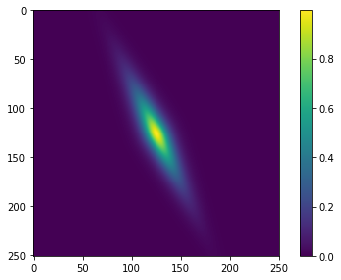

In [43]:
plt.figure()
plt.imshow(z)
plt.colorbar()
plt.tight_layout()
plt.show()